## Downloading and Importing the neccessary libraries

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings("ignore")        
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import seaborn as sns
import squarify

### Loading dataset

In [2]:
df=pd.read_csv("aug_train.csv")

#### Creating a copy of the dataset just for visualisation

In [3]:
aug_train=df.copy()
aug_test = pd.read_csv('aug_test.csv')

In [4]:
aug_train['last_new_job'] = aug_train['last_new_job'].apply(lambda x: 'Never' if x == 'never' else x) #just reads nicer
aug_train['enrolled_university'][aug_train['enrolled_university'] == 'no_enrollment'] = 'No Enrollment' #just reads nicer
aug_train['company_size'] = aug_train['company_size'].apply(lambda x: '10-49' if x == '10/49' else x) #diff replacement method

aug_train['experience'] = aug_train['experience'].apply(lambda x: '0' if x == '<1' else x)
aug_train['experience'] = aug_train['experience'].apply(lambda x: '20' if x == '>20' else x)


aug_train['company_size'].fillna('0',inplace=True)
aug_train['company_type'].fillna('Unknown',inplace=True)
aug_train['major_discipline'].fillna('Unknown',inplace=True)
aug_train['gender'].fillna('Not provided',inplace=True)



aug_test['last_new_job'] = aug_test['last_new_job'].apply(lambda x: 'Never' if x == 'never' else x) #just reads nicer
aug_test['enrolled_university'][aug_test['enrolled_university'] == 'no_enrollment'] = 'No Enrollment' #just reads nicer
aug_test['company_size'] = aug_test['company_size'].apply(lambda x: '10-49' if x == '10/49' else x) #diff replacement method

aug_test['experience'] = aug_test['experience'].apply(lambda x: '0' if x == '<1' else x)
aug_test['experience'] = aug_test['experience'].apply(lambda x: '20' if x == '>20' else x)

aug_test['company_size'].fillna('0',inplace=True)
aug_test['company_type'].fillna('Unknown',inplace=True)
aug_test['major_discipline'].fillna('Unknown',inplace=True)
aug_test['gender'].fillna('Not provided',inplace=True)




aug_train['target'].groupby(aug_train['gender']).mean()

gender
Female          0.263328
Male            0.227819
Not provided    0.308119
Other           0.261780
Name: target, dtype: float64

In [5]:
aug_train.dropna(inplace=True)
aug_test.dropna(inplace=True)
aug_train.isna().sum()/len(aug_train)

enrollee_id               0.0
city                      0.0
city_development_index    0.0
gender                    0.0
relevent_experience       0.0
enrolled_university       0.0
education_level           0.0
major_discipline          0.0
experience                0.0
company_size              0.0
company_type              0.0
last_new_job              0.0
training_hours            0.0
target                    0.0
dtype: float64

In [6]:
aug_train['experience'] = aug_train['experience'].astype(str).astype(int)
aug_test['experience'] = aug_test['experience'].astype(str).astype(int)

aug_train['training_hours'] = aug_train['training_hours'].astype(str).astype(int)
aug_test['training_hours'] = aug_test['training_hours'].astype(str).astype(int)

In [7]:
ed_order = ['Primary School','High School','Graduate','Masters','Phd']
enroll_order = ['No Enrollment','Part time course','Full time course']
disc_order = ['STEM','Unknown','Humanities','Other','Business Degree','Arts','No Major']
exp_yrs_order = ['<1','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','>20']
exp_yrs_order_2 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
size_order = ['0','<10', '10-49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+']
job_order = ['Never', '1', '2', '3', '4', '>4']
exp_order =['No relevant experience','Has relevant experience']
gender_order = ['Male','Female','Other','Not provided']
company_order = ['Pvt Ltd','Unknown','Funded Startup','Public Sector','Early Stage Startup','NGO','Other']
 
train_df = aug_train
test_df = aug_test

## VISUALISATION

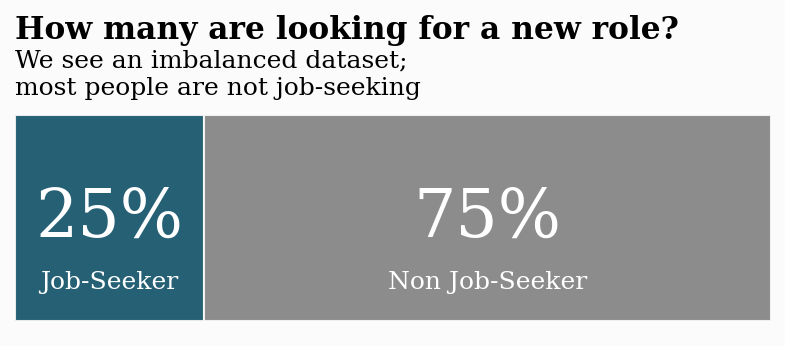

In [8]:
x=train_df.groupby(['target'])['target'].count()
y=len(train_df)
r=((x/y)).round(2)
ratio = pd.DataFrame(r).T


fig, ax = plt.subplots(1,1,figsize=(6.5, 2),dpi=150)
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color) 

ax.barh(ratio.index, ratio[1.0], color='#0e4f66', alpha=0.9, ec=background_color, label='Job-Seeker')
ax.barh(ratio.index, ratio[0.0], left=ratio[1.0], color='gray', alpha=0.9,ec=background_color, label='Non Job-Seeker')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
ax.legend().set_visible(False)
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
for i in ratio.index:
    ax.annotate(f"{int(ratio[1.0][i]*100)}%", xy=(ratio[1.0][i]/2, i),va = 'center', ha='center',fontsize=32, fontweight='light', fontfamily='serif',color='white')
    ax.annotate("Job-Seeker", xy=(ratio[1.0][i]/2, -0.25),va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',color='white')
    
    
for i in ratio.index:
    ax.annotate(f"{int(ratio[0.0][i]*100)}%", xy=(ratio[1.0][i]+ratio[0.0][i]/2, i),va = 'center', ha='center',fontsize=32, fontweight='light', fontfamily='serif',color='white')
    ax.annotate("Non Job-Seeker", xy=(ratio[1.0][i]+ratio[0.0][i]/2, -0.25),va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',color='white')


fig.text(0.125,1.1,'How many are looking for a new role?', fontfamily='serif',fontsize=15, fontweight='bold')
fig.text(0.125,0.915,'We see an imbalanced dataset;\nmost people are not job-seeking',fontfamily='serif',fontsize=12)  


plt.show()

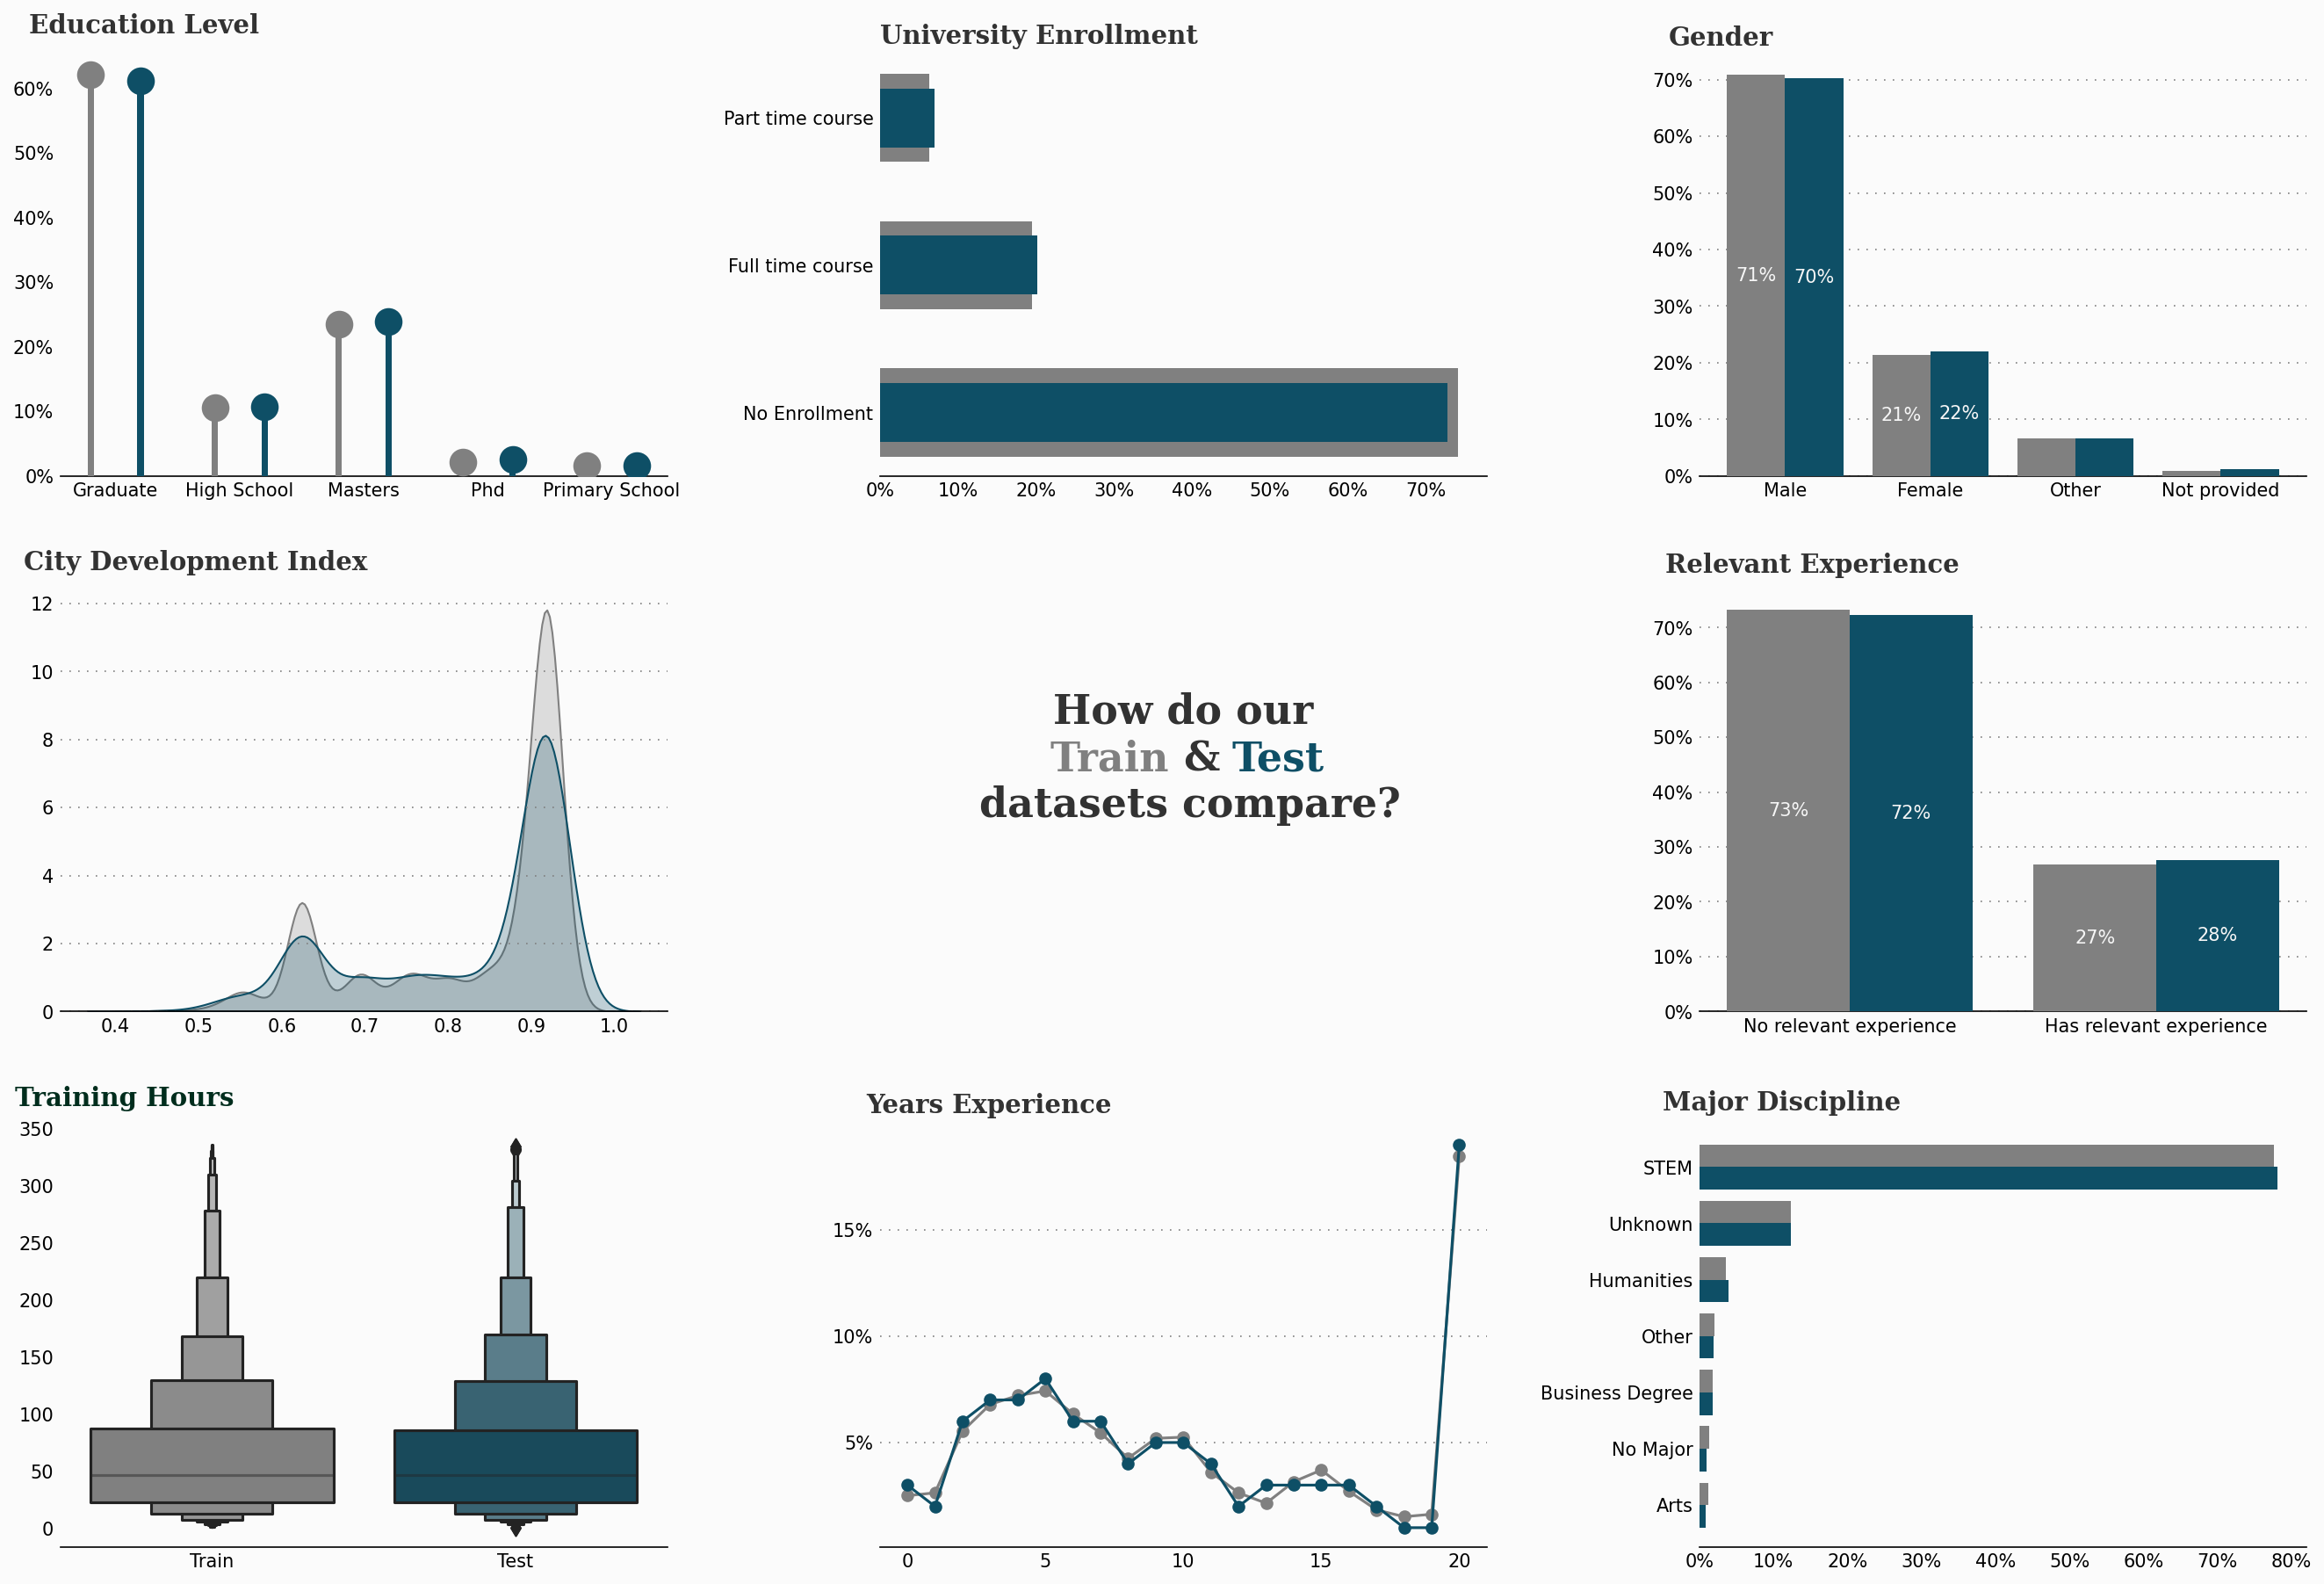

In [9]:
background_color = "#fbfbfb"

fig = plt.figure(figsize=(22,15),dpi=150)
fig.patch.set_facecolor(background_color)
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.35, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[2, 2])


# Ax0 - EDUCATION LEVEL
train = pd.DataFrame(train_df["education_level"].value_counts())
train["Percentage"] = train["education_level"].apply(lambda x: x/sum(train["education_level"])*100)
train = train.sort_index()

test = pd.DataFrame(test_df["education_level"].value_counts())
test["Percentage"] = test["education_level"].apply(lambda x: x/sum(test["education_level"])*100)
test = test.sort_index()

ax0.bar(np.arange(len(train.index)), height=train["Percentage"], zorder=3, color="gray", width=0.05)
ax0.scatter(np.arange(len(train.index)), train["Percentage"], zorder=3,s=200, color="gray")
ax0.bar(np.arange(len(test.index))+0.4, height=test["Percentage"], zorder=3, color="#0e4f66", width=0.05)
ax0.scatter(np.arange(len(test.index))+0.4, test["Percentage"], zorder=3,s=200, color="#0e4f66")
ax0.text(-0.5, 68.5, 'Education Level', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax0.yaxis.set_major_formatter(mtick.PercentFormatter())
ax0.yaxis.set_major_locator(mtick.MultipleLocator(10))
ax0.set_xticks(np.arange(len(train.index))+0.4 / 2)
ax0.set_xticklabels(list(train.index),rotation=0)


# Ax1 - ENROLLED IN UNIVESITY
train = pd.DataFrame(train_df["enrolled_university"].value_counts())
train["Percentage"] = train["enrolled_university"].apply(lambda x: x/sum(train["enrolled_university"])*100).loc[enroll_order]
test = pd.DataFrame(test_df["enrolled_university"].value_counts())
test["Percentage"] = test["enrolled_university"].apply(lambda x: x/sum(test["enrolled_university"])*100).loc[enroll_order]

ax1.text(0, 2.5, 'University Enrollment', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax1.barh(train.index, train['Percentage'], color="gray", zorder=3, height=0.6)
ax1.barh(test.index, test['Percentage'], color="#0e4f66", zorder=3, height=0.4)
ax1.xaxis.set_major_formatter(mtick.PercentFormatter())
ax1.xaxis.set_major_locator(mtick.MultipleLocator(10))

###
# Ax2 - GENDER 
train = pd.DataFrame(train_df["gender"].value_counts())
train["Percentage"] = train["gender"].apply(lambda x: x/sum(train["gender"])*100)
test = pd.DataFrame(test_df["gender"].value_counts())
test["Percentage"] = test["gender"].apply(lambda x: x/sum(test["gender"])*100)

x = np.arange(len(train))
ax2.text(-0.6, 76, 'Gender', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax2.bar(x, height=train["Percentage"], zorder=3, color="gray", width=0.4)
ax2.bar(x+0.4, height=test["Percentage"], zorder=3, color="#0e4f66", width=0.4)
ax2.set_xticks(x + 0.4 / 2)
ax2.set_xticklabels(['Male','Female','Other','Not provided'])
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.yaxis.set_major_locator(mtick.MultipleLocator(10))
for i,j in zip([0, 1], train["Percentage"]):
    ax2.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], test["Percentage"]):
    ax2.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
    

    
## Ax 3 - CDI

ax3.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
train = pd.DataFrame(train_df["city_development_index"])
test = pd.DataFrame(test_df["city_development_index"])
sns.kdeplot(train["city_development_index"], ax=ax3,color="gray", shade=True, label="Train")
sns.kdeplot(test["city_development_index"], ax=ax3, color="#0e4f66", shade=True, label="Test")
ax3.text(0.29, 13, 'City Development Index', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax3.yaxis.set_major_locator(mtick.MultipleLocator(2))
ax3.set_ylabel('')    
ax3.set_xlabel('')

## AX4 - TITLE

ax4.spines["bottom"].set_visible(False)
ax4.tick_params(left=False, bottom=False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.text(0.5, 0.6, 'How do our\n\n datasets compare?', horizontalalignment='center', verticalalignment='center',fontsize=22, fontweight='bold', fontfamily='serif', color="#323232")
ax4.text(0.28,0.57,"Train", fontweight="bold", fontfamily='serif', fontsize=22, color='gray')
ax4.text(0.5,0.57,"&", fontweight="bold", fontfamily='serif', fontsize=22, color='#323232')
ax4.text(0.58,0.57,"Test", fontweight="bold", fontfamily='serif', fontsize=22, color='#0e4f66')




### Ax5 - RELEVANT EXPERIENCE
train = pd.DataFrame(train_df["relevent_experience"].value_counts())
train["Percentage"] = train["relevent_experience"].apply(lambda x: x/sum(train["relevent_experience"])*100)
test = pd.DataFrame(test_df["relevent_experience"].value_counts())
test["Percentage"] = test["relevent_experience"].apply(lambda x: x/sum(test["relevent_experience"])*100)
x = np.arange(len(train))
ax5.text(-0.4, 80, 'Relevant Experience', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax5.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax5.bar(x, height=train["Percentage"], zorder=3, color="gray", width=0.4)
ax5.bar(x+0.4, height=test["Percentage"], zorder=3, color="#0e4f66", width=0.4)
ax5.set_xticks(x + 0.4 / 2)
ax5.set_xticklabels(['No relevant experience','Has relevant experience'])
ax5.yaxis.set_major_formatter(mtick.PercentFormatter())
ax5.yaxis.set_major_locator(mtick.MultipleLocator(10))

for i,j in zip([0, 1, 2], train["Percentage"]):
    ax5.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1, 2], test["Percentage"]):
    ax5.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')

    
    
# Ax6 - TRAINING HOURS
train = pd.DataFrame(train_df["training_hours"])
train["TrainTest"] = "Train"
test = pd.DataFrame(test_df["training_hours"])
test["TrainTest"] = "Test"
ax6.text(-0.65, 370, 'Training Hours', fontsize=14, fontweight='bold', fontfamily='serif', color="#002d1d")
comb_graph_temp_df = pd.concat([train, test], axis=0)
sns.boxenplot(ax=ax6, y="training_hours", x="TrainTest", data=comb_graph_temp_df, palette=["gray", "#0e4f66"])
ax6.set_xlabel("")
ax6.set_ylabel("")


# Ax7 - EXPERIENCE YRS
train = pd.DataFrame(train_df["experience"].value_counts())
train["Percentage"] = train["experience"].apply(lambda x: x/sum(train["experience"])*100)
train = train.sort_index()
test = pd.DataFrame(test_df["experience"].value_counts())
test["Percentage"] = round(test["experience"].apply(lambda x: x/sum(test["experience"])*100),).astype(int)
test = test.sort_index()
ax7.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax7.plot(train.index, train["Percentage"], zorder=3, color="gray", marker='o')
ax7.plot(test.index, test["Percentage"], zorder=3, color="#0e4f66", marker='o')
ax7.text(-1.5, 20.5, 'Years Experience', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax7.set_yticklabels(labels = ['0   ', '5%','10%','15%'])
ax7.xaxis.set_major_locator(mtick.MultipleLocator(5))
ax7.yaxis.set_major_locator(mtick.MultipleLocator(5))


# Ax8 - MAJOR DISCIPLINE
train = pd.DataFrame(train_df["major_discipline"].value_counts())
train["Percentage"] = train["major_discipline"].apply(lambda x: x/sum(train["major_discipline"])*100)
test = pd.DataFrame(test_df["major_discipline"].value_counts())
test["Percentage"] = test["major_discipline"].apply(lambda x: x/sum(test["major_discipline"])*100)

ax8.barh(np.arange(len(train.index)), train["Percentage"], zorder=3, color="gray", height=0.4)
ax8.barh(np.arange(len(test.index))+0.4, test["Percentage"], zorder=3, color="#0e4f66", height=0.4)
ax8.text(-5, -0.8, 'Major Discipline', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax8.xaxis.set_major_formatter(mtick.PercentFormatter())
ax8.yaxis.set_major_locator(mtick.MultipleLocator(1))
ax8.set_yticks(np.arange(len(test.index))+0.4 / 2)
ax8.set_yticklabels(list(test.index))
ax8.invert_yaxis()



for i in range(0,9):
    locals()["ax"+str(i)].set_facecolor(background_color) 
    
for i in range(0,9):
    locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both',length=0)


for s in ["top","right","left"]:
    for i in range(0,9):
        locals()["ax"+str(i)].spines[s].set_visible(False)

plt.show()

## We see that train and test sets are identical

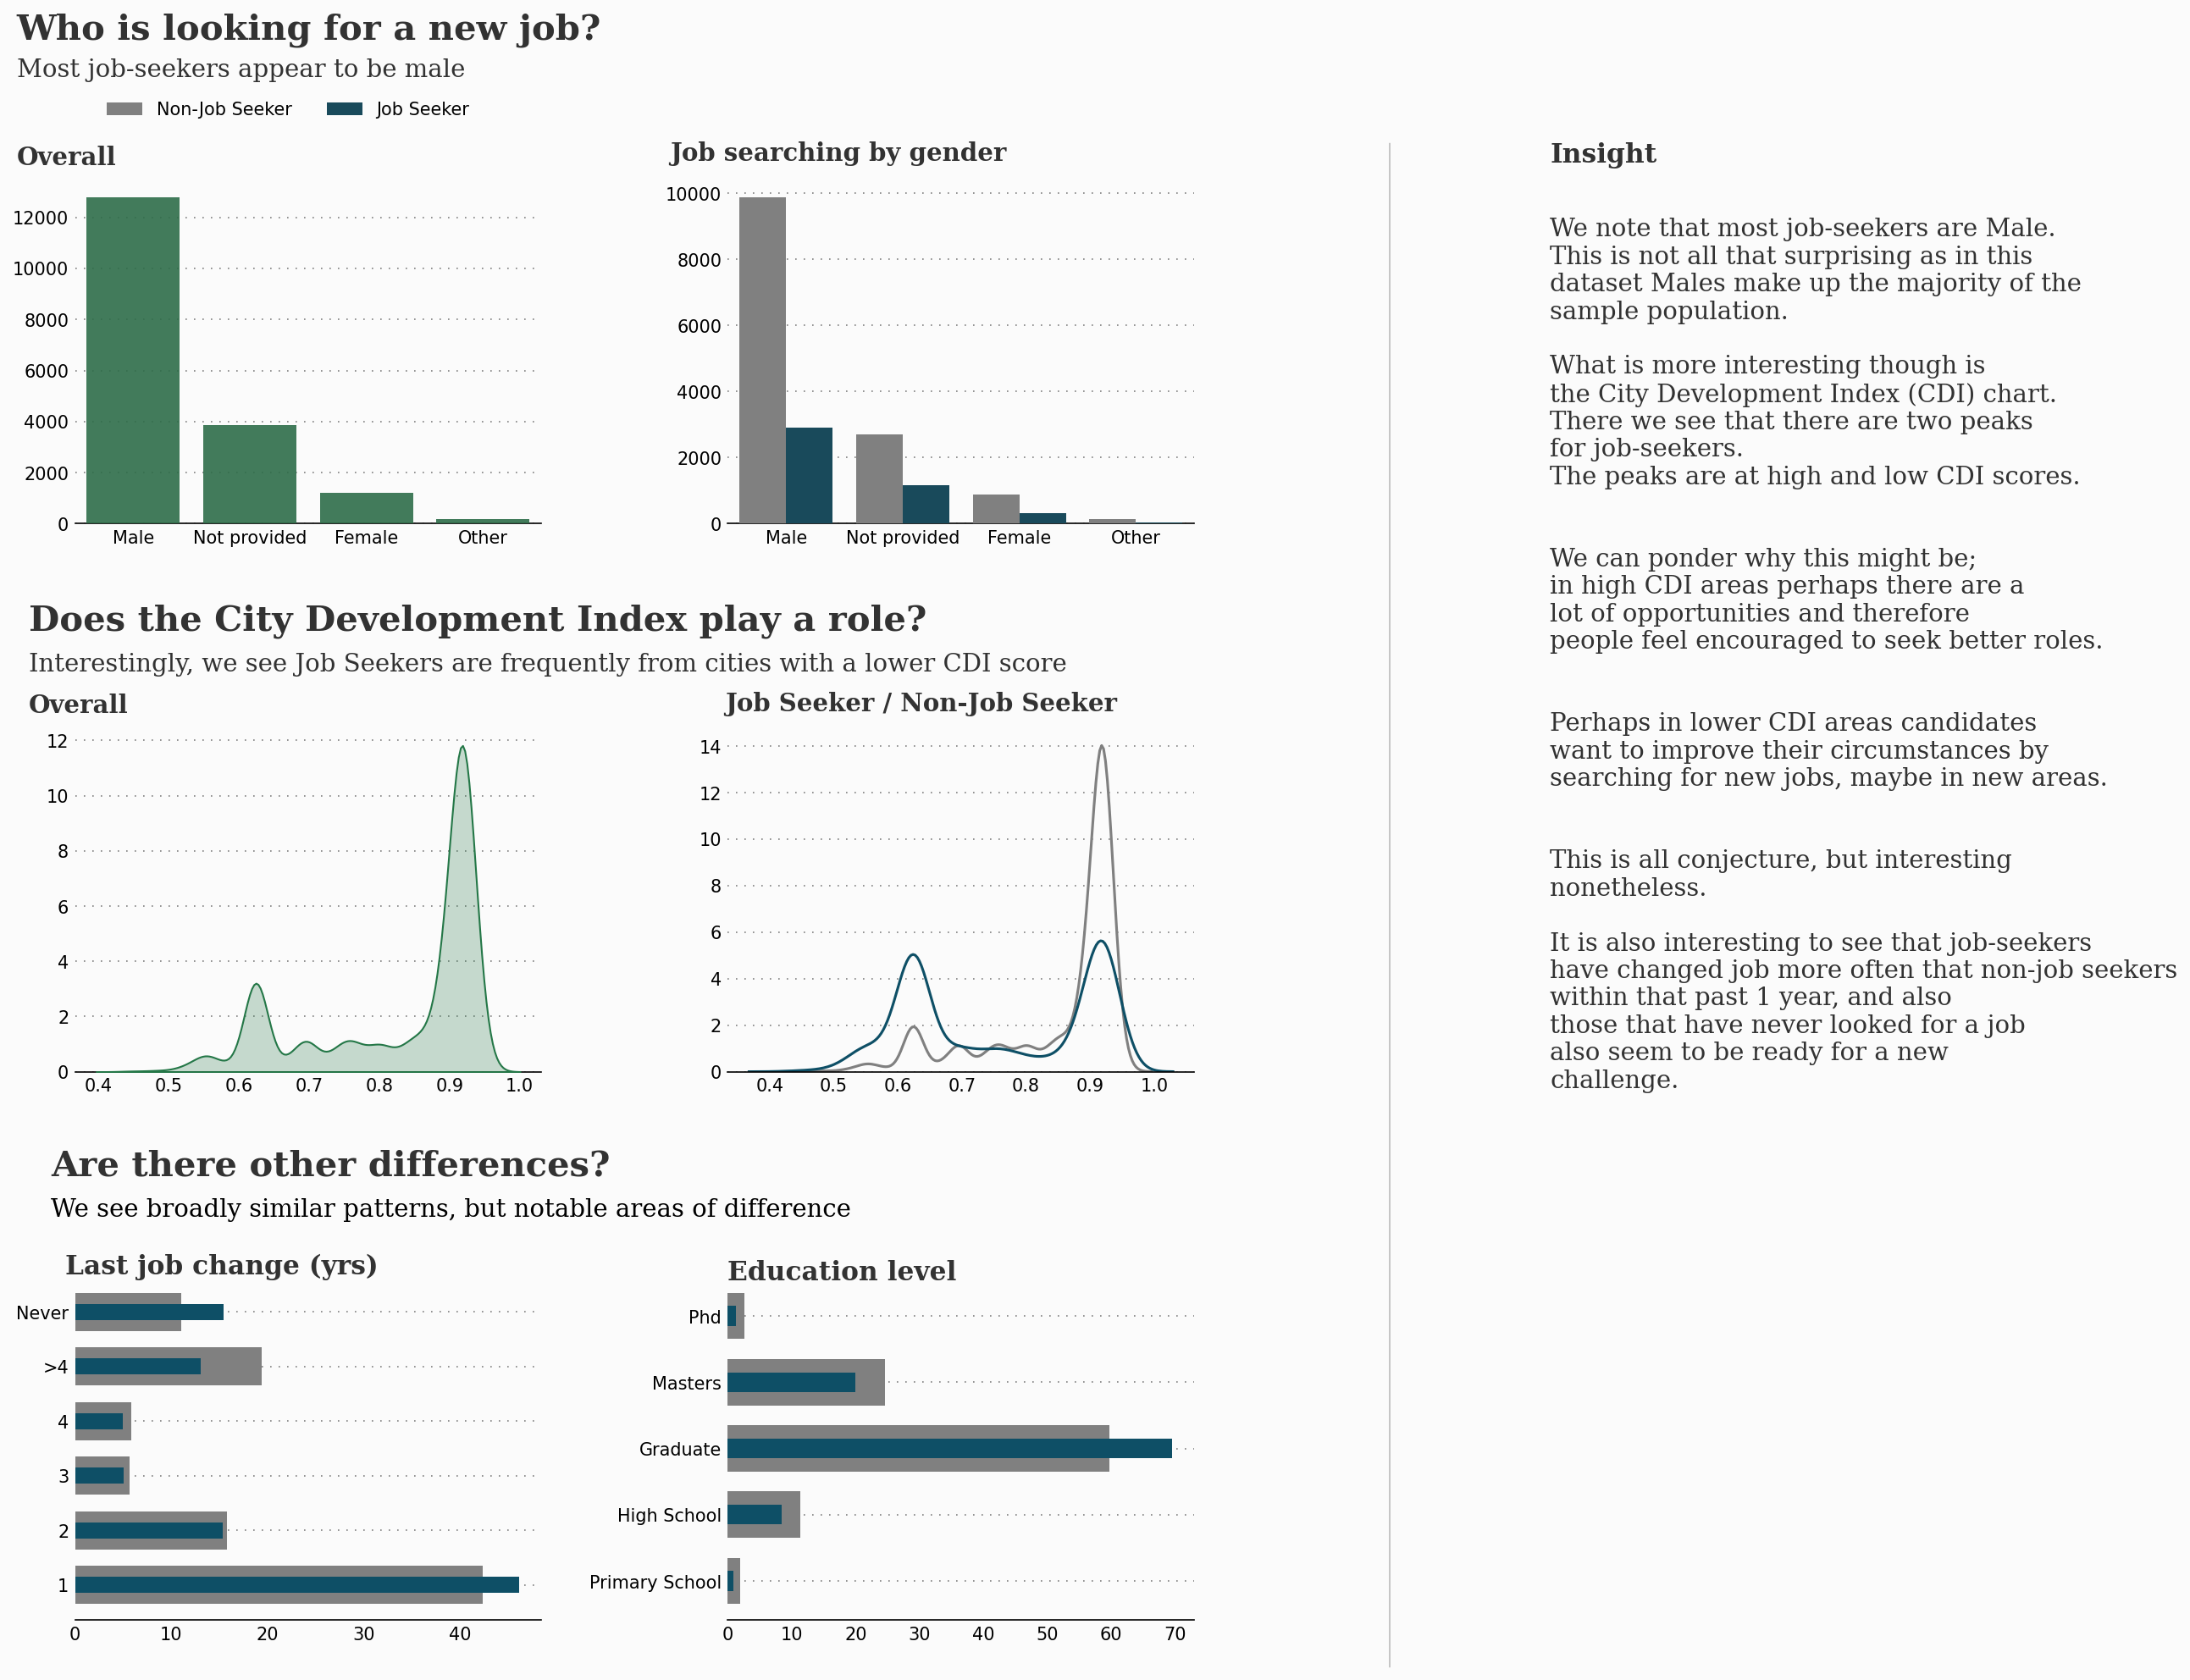

In [10]:
color_palette=["gray","#0e4f66"]
fig = plt.figure(figsize=(18,15), dpi=150)
fig.patch.set_facecolor(background_color) # figure background color
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.4, hspace=0.6)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])

# Distribution
ax0.text(-1, 19000, 'Who is looking for a new job?', fontsize=20, fontweight='bold', fontfamily='serif', color="#323232")
ax0.text(-1, 17500, 'Most job-seekers appear to be male', fontsize=14, fontweight='light', fontfamily='serif', color="#323232")
ax0.text(-1, 14050, 'Overall', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
sns.countplot(x=train_df["gender"], color="#247747", ax=ax0, zorder=3,alpha=0.9)



# Gender
ax1.text(-1, 11000, 'Job searching by gender', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
sns.countplot(x="gender", hue="target", data=train_df, palette=color_palette, ax=ax1, zorder=3)
legend_labels, _= ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ["Non-Job Seeker", "Job Seeker"], ncol=2, bbox_to_anchor=(-0.52, 1.28), facecolor=background_color, edgecolor=background_color)



# CDI
ax2.text(0.3, 16, 'Does the City Development Index play a role?', fontsize=20, fontweight='bold', fontfamily='serif', color="#323232")
ax2.text(0.3, 14.5, 'Interestingly, we see Job Seekers are frequently from cities with a lower CDI score', fontsize=14, fontweight='light', fontfamily='serif', color="#323232")
ax2.text(0.3, 13, 'Overall', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
sns.kdeplot(train_df["city_development_index"], color="#247747", shade=True, ax=ax2, zorder=3)



ax3.text(0.33, 15.5, 'Job Seeker / Non-Job Seeker', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
sns.kdeplot(train_df.loc[(train_df["target"]==0), "city_development_index"], color="gray", label="Not Survived", ax=ax3)
sns.kdeplot(train_df.loc[(train_df["target"]==1), "city_development_index"], color="#0e4f66", label="Survived", ax=ax3)



###
aug_train['count'] = 1
job_hunt_only = aug_train[aug_train['target']==1]
no_job_hunt_only = aug_train[aug_train['target']==0]

job_change = aug_train.groupby(['education_level','last_new_job'])['experience'].sum().unstack().loc[ed_order,job_order]

job_hunt_only.groupby(['target','last_new_job'])['count'].sum().unstack()
notseek_job_change = no_job_hunt_only.groupby(['target','last_new_job'])['count'].sum().unstack().T
seek_job_change = job_hunt_only.groupby(['target','last_new_job'])['count'].sum().unstack().T

notseek_job_change.columns = ['count']
seek_job_change.columns = ['count']

notseek_job_change["percentage"] = notseek_job_change["count"].apply(lambda x: x/sum(notseek_job_change["count"])) *100
seek_job_change["percentage"] = seek_job_change["count"].apply(lambda x: x/sum(seek_job_change["count"])) *100


ed_notseek_job_change = no_job_hunt_only.groupby(['target','education_level'])['count'].sum().unstack().T.loc[ed_order]
ed_seek_job_change = job_hunt_only.groupby(['target','education_level'])['count'].sum().unstack().T.loc[ed_order]

ed_notseek_job_change.columns = ['count']
ed_seek_job_change.columns = ['count']

ed_notseek_job_change["percentage"] = ed_notseek_job_change["count"].apply(lambda x: x/sum(ed_notseek_job_change["count"])) *100
ed_seek_job_change["percentage"] = ed_seek_job_change["count"].apply(lambda x: x/sum(ed_seek_job_change["count"])) *100

###


ax4.barh(notseek_job_change.index, notseek_job_change['percentage'], color="gray", zorder=3, height=0.7)
ax4.barh(seek_job_change.index, seek_job_change['percentage'], color="#0e4f66", zorder=3, height=0.3)
ax4.xaxis.set_major_locator(mtick.MultipleLocator(10))


##
ax5.barh(ed_notseek_job_change.index, ed_notseek_job_change['percentage'], color="gray", zorder=3, height=0.7)
ax5.barh(ed_seek_job_change.index, ed_seek_job_change['percentage'], color="#0e4f66", zorder=3, height=0.3)
ax5.xaxis.set_major_locator(mtick.MultipleLocator(10))

##
ax4.text(-1, 5.7, 'Last job change (yrs)',fontsize=15, fontweight='bold', fontfamily='serif',color='#323232')
ax5.text(0, 4.55, 'Education level', fontsize=15, fontweight='bold', fontfamily='serif',color='#323232')

ax4.text(-2.5, 7.5, 'Are there other differences?', 
         fontsize=20, fontweight='bold', fontfamily='serif',color='#323232')

ax4.text(-2.5, 6.75, 
         'We see broadly similar patterns, but notable areas of difference', 
         fontsize=14, fontweight='light', fontfamily='serif')


####

fig.text(0.77, 0.89
         , 'Insight', fontsize=15, fontweight='bold', fontfamily='serif',color='#323232')

fig.text(0.77, 0.39, '''
We note that most job-seekers are Male.
This is not all that surprising as in this
dataset Males make up the majority of the
sample population.

What is more interesting though is
the City Development Index (CDI) chart.
There we see that there are two peaks
for job-seekers. 
The peaks are at high and low CDI scores. 


We can ponder why this might be;
in high CDI areas perhaps there are a 
lot of opportunities and therefore
people feel encouraged to seek better roles.


Perhaps in lower CDI areas candidates
want to improve their circumstances by
searching for new jobs, maybe in new areas. 


This is all conjecture, but interesting
nonetheless.

It is also interesting to see that job-seekers
have changed job more often that non-job seekers
within that past 1 year, and also
those that have never looked for a job
also seem to be ready for a new
challenge.
'''
         , fontsize=14, fontweight='light', fontfamily='serif',color='#323232')



import matplotlib.lines as lines
l1 = lines.Line2D([0.7, 0.7], [0.1, 0.9], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

for s in ["top","right","left"]:
    for i in range(0,6):
        locals()["ax"+str(i)].spines[s].set_visible(False)
        
for i in range(0,6):
        locals()["ax"+str(i)].set_facecolor(background_color)
        locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both',length=0)
        locals()["ax"+str(i)].grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))      

        
for x in range(0,4):
    for y in range(0,4):
        locals()["ax"+str(x)].set_xlabel("")
        locals()["ax"+str(y)].set_ylabel("")

plt.show()

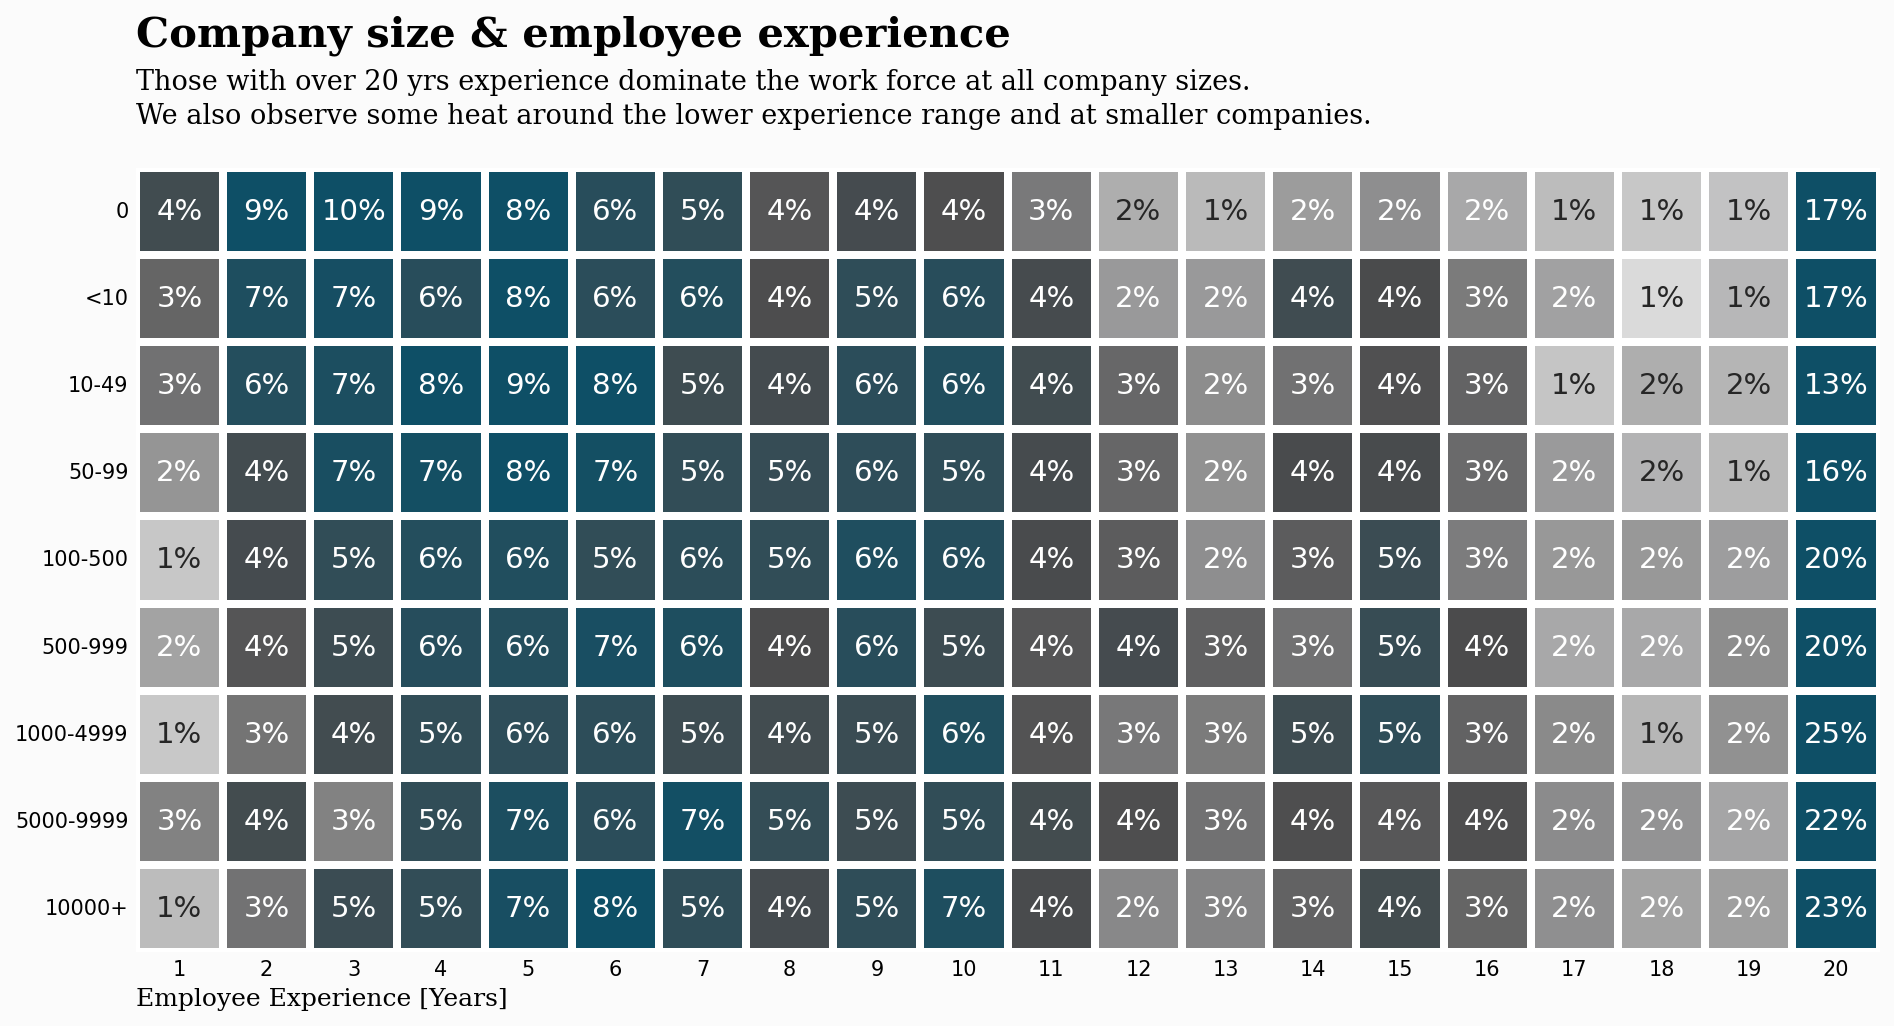

In [11]:
pv_gen_size = pd.pivot_table(aug_train, values='count',index=['gender'],columns=['company_size'],aggfunc=np.sum).loc[gender_order, size_order]
ct_gen_size = pd.crosstab(aug_train['company_size'],aug_train['experience'], normalize='index').loc[size_order,exp_yrs_order_2]


fig = plt.figure(figsize=(15,10), dpi=150) 
fig.patch.set_facecolor(background_color)
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0, hspace=-0.09)
ax0 = fig.add_subplot(gs[:,:])

colors = ["#fbfbfb", "#4b4b4c","#0e4f66"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

sns.heatmap(ax=ax0, data=ct_gen_size, linewidths=.1, vmin=0, vmax=0.075,
            square=True, cbar=False, cmap=colormap,linewidth=3, annot=True, fmt='1.0%',annot_kws={"fontsize":14})

 
ax0.set_facecolor(background_color) 
ax0.set_xlabel("Employee Experience [Years]",fontfamily='serif',fontsize=12,loc='left')
ax0.set_ylabel("")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)

    
ax0.text(0, -1.4, 
         'Company size & employee experience', 
         fontsize=20, 
         fontweight='bold', 
         fontfamily='serif',
        )

ax0.text(0, -0.9, 
         'Those with over 20 yrs experience dominate the work force at all company sizes.', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )
ax0.text(0, -0.5, 
         'We also observe some heat around the lower experience range and at smaller companies.', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )

ax0.tick_params(axis=u'both', which=u'both',length=0)
plt.show()

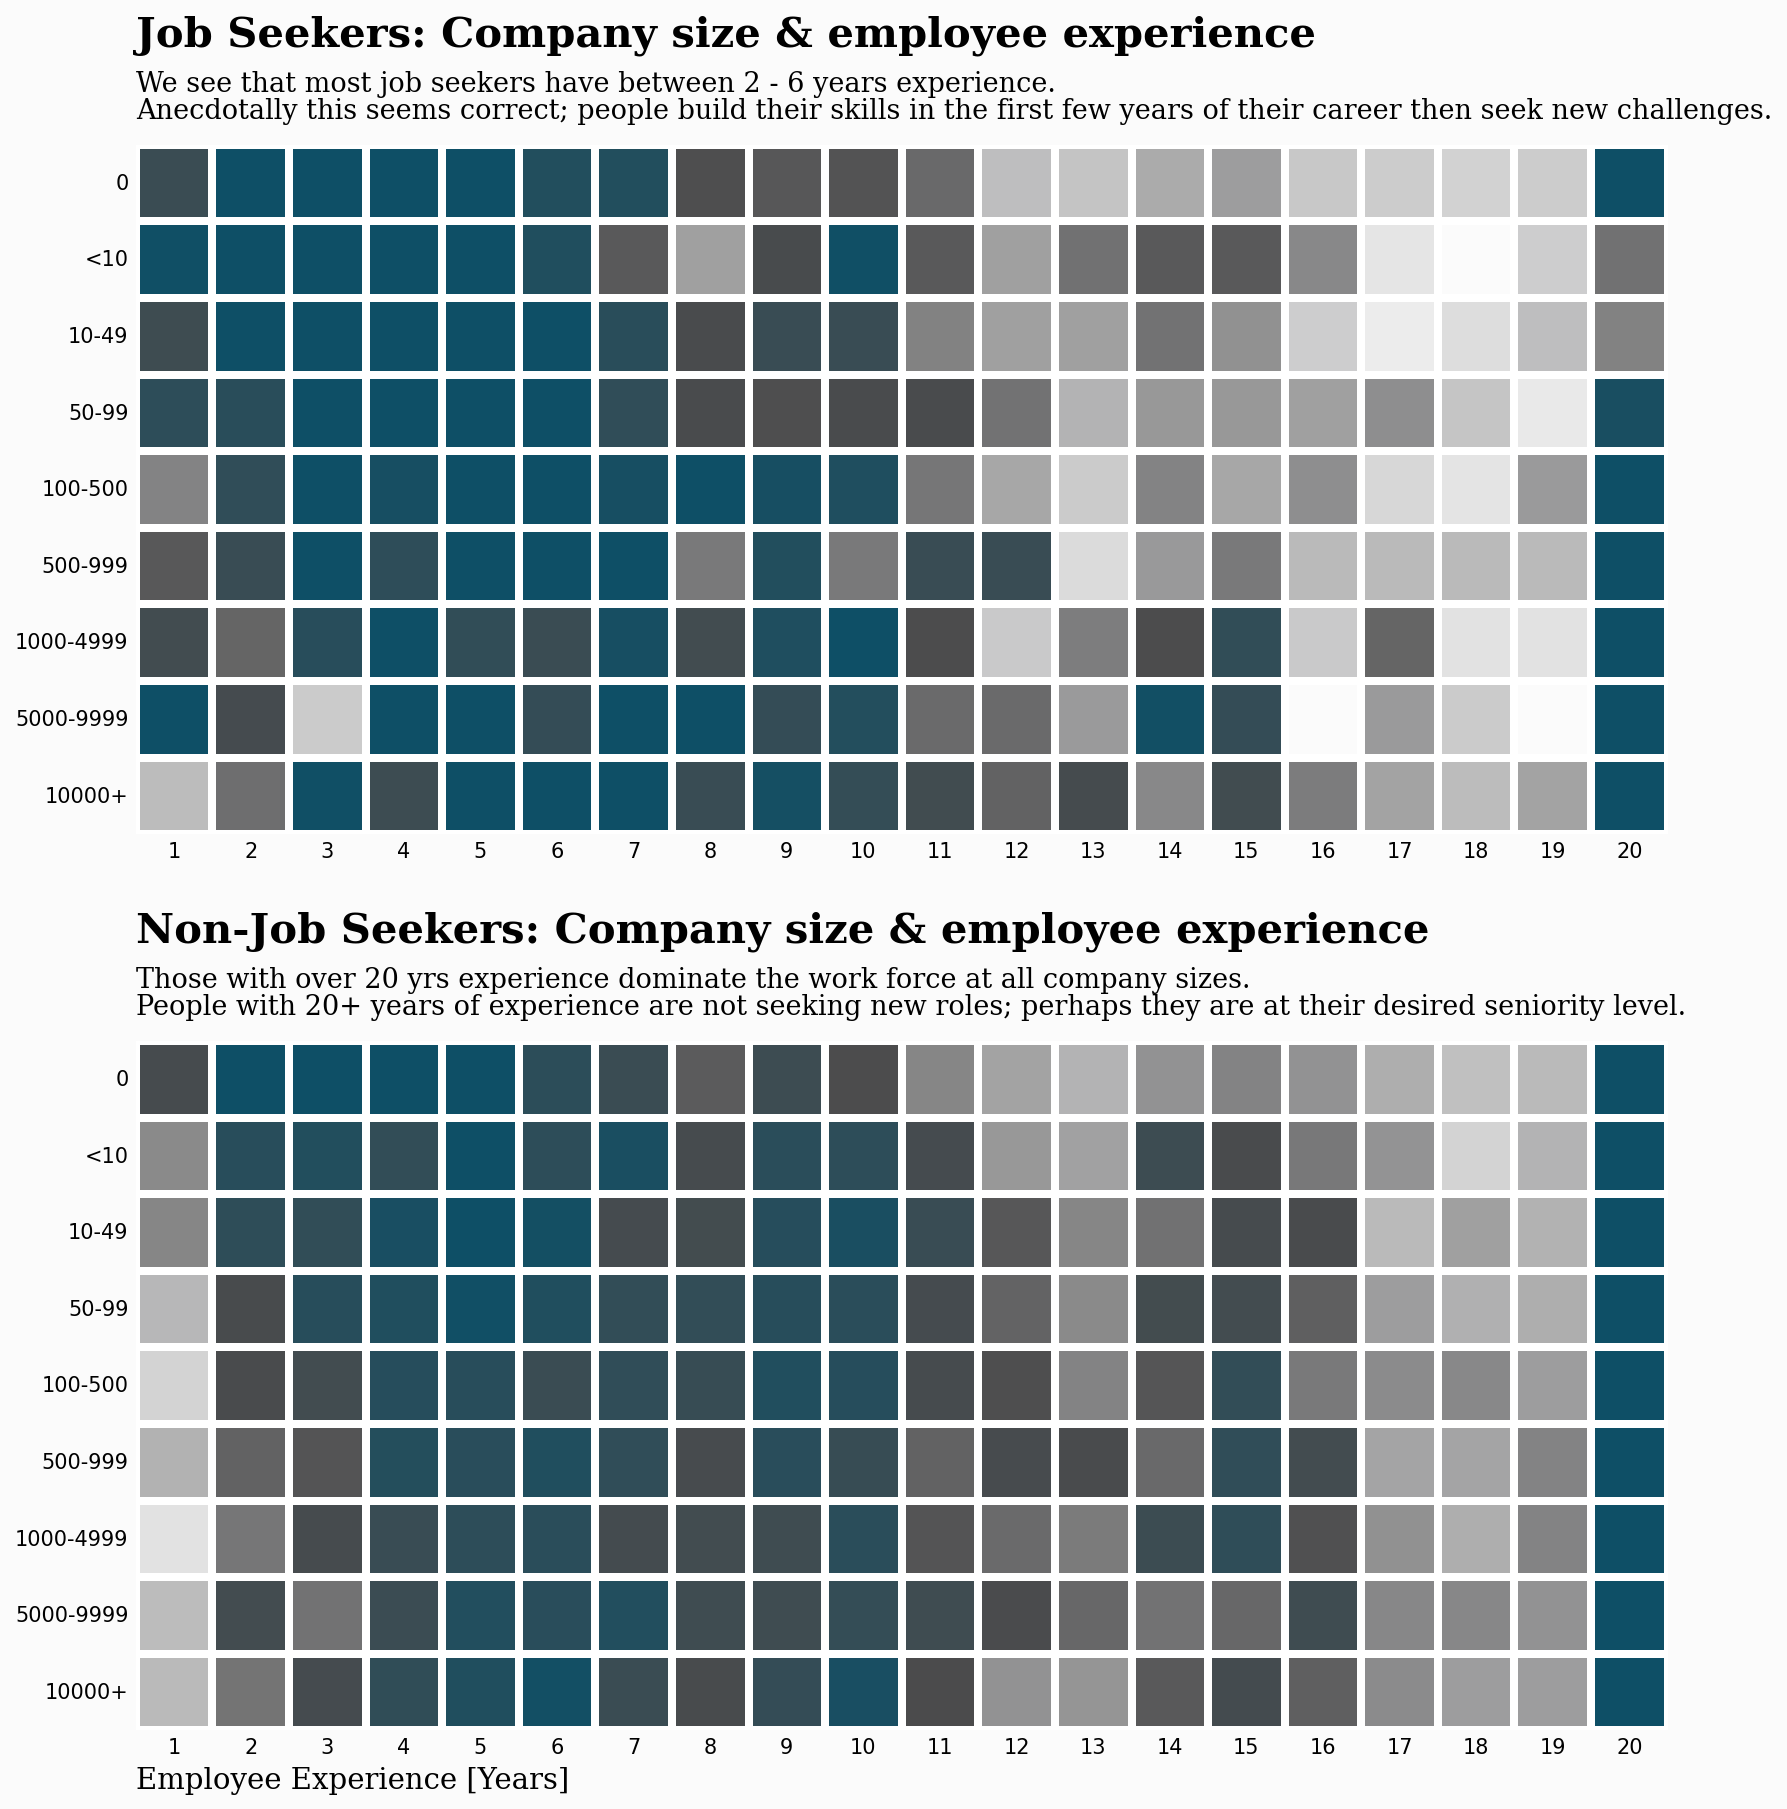

In [12]:
job_hunt_only = aug_train[aug_train['target']==1]
no_job_hunt_only = aug_train[aug_train['target']==0]

job_seek = pd.crosstab(job_hunt_only['company_size'],job_hunt_only['experience'], normalize='index').loc[size_order,exp_yrs_order_2]
no_seek = pd.crosstab(no_job_hunt_only['company_size'],no_job_hunt_only['experience'], normalize='index').loc[size_order,exp_yrs_order_2]

###
fig = plt.figure(figsize=(14,14),dpi=150)
fig.patch.set_facecolor(background_color)
gs = fig.add_gridspec(2, 3)
gs.update(wspace=0.2, hspace=0.3)
ax0 = fig.add_subplot(gs[0,:])
ax1 = fig.add_subplot(gs[1,:])


colors = ["#fbfbfb", "#4b4b4c","#0e4f66"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

sns.heatmap(ax=ax0, data=job_seek, linewidths=.1, vmin=0, vmax=0.075,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap,linewidth=3, annot=False, fmt='1.0%',annot_kws={"fontsize":14})

sns.heatmap(ax=ax1, data=no_seek, linewidths=.1, vmin=0, vmax=0.075,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap,linewidth=3, annot=False, fmt='1.0%',annot_kws={"fontsize":14})

ax0.set_facecolor(background_color) 
ax0.set_xlabel("")
ax0.set_ylabel("")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)

    
ax0.set_xlabel("")
ax0.set_ylabel("")
ax1.set_xlabel("Employee Experience [Years]",fontfamily='serif',fontsize=14,loc='left')
ax1.set_ylabel("")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)

    
ax0.text(0, -1.3, 
         'Job Seekers: Company size & employee experience', 
         fontsize=20, 
         fontweight='bold', 
         fontfamily='serif',
        )

ax1.text(0, -0.7, 
         'Those with over 20 yrs experience dominate the work force at all company sizes.', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )
ax1.text(0, -0.35, 
         'People with 20+ years of experience are not seeking new roles; perhaps they are at their desired seniority level.', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )
    
ax1.text(0, -1.3, 
         'Non-Job Seekers: Company size & employee experience', 
         fontsize=20, 
         fontweight='bold', 
         fontfamily='serif',
        )

ax0.text(0, -0.7, 
         'We see that most job seekers have between 2 - 6 years experience.', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )
ax0.text(0, -0.35, 
         'Anecdotally this seems correct; people build their skills in the first few years of their career then seek new challenges.', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )

ax0.tick_params(axis=u'both', which=u'both',length=0)
ax1.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

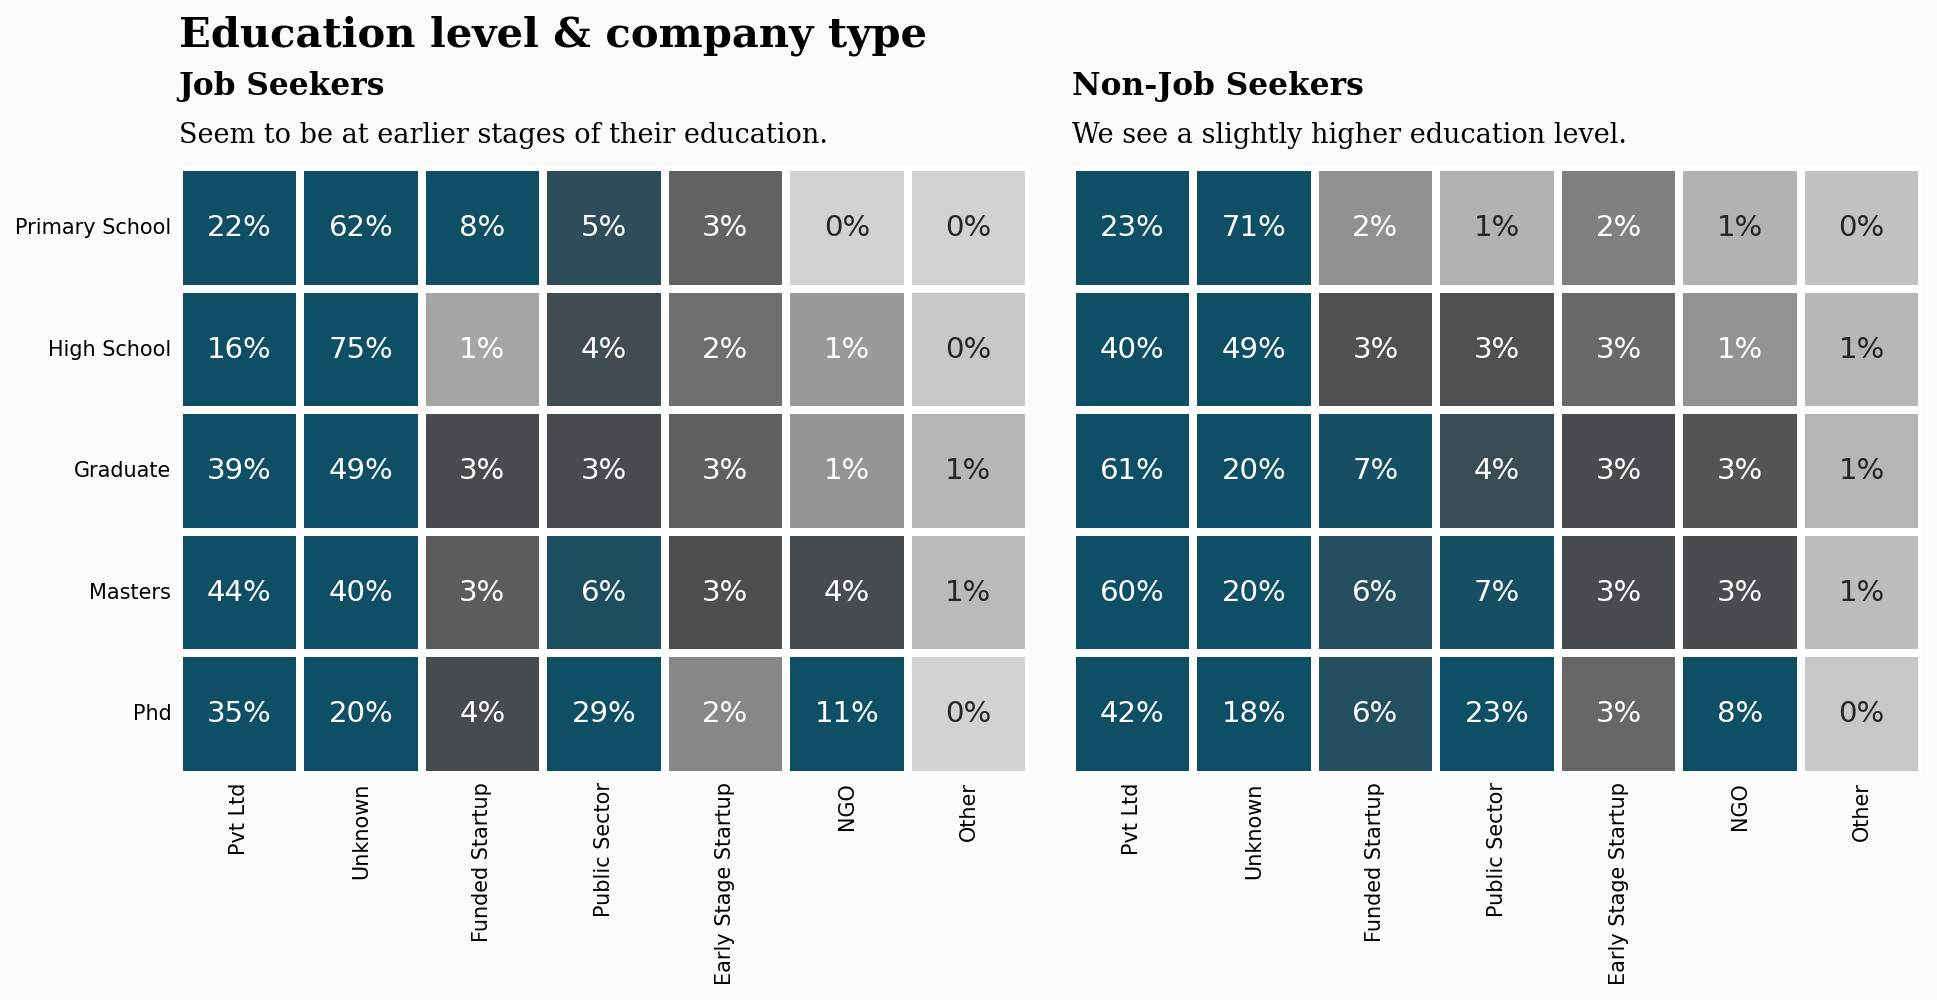

In [13]:
job_hunt_only = aug_train[aug_train['target']==1]
no_job_hunt_only = aug_train[aug_train['target']==0]

job_seek = pd.crosstab(job_hunt_only['education_level'],job_hunt_only['company_type'], normalize='index').loc[ed_order,company_order]
no_seek = pd.crosstab(no_job_hunt_only['education_level'],no_job_hunt_only['company_type'], normalize='index').loc[ed_order,company_order]


fig = plt.figure(figsize=(15,15),dpi=150)
fig.patch.set_facecolor(background_color)

gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.05, hspace=0.3)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])


colors = ["#fbfbfb", "#4b4b4c","#0e4f66"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

sns.heatmap(ax=ax0, data=job_seek, linewidths=.1, vmin=-0.01, vmax=0.075,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap,linewidth=3, annot=True, fmt='1.0%',annot_kws={"fontsize":14})

sns.heatmap(ax=ax1, data=no_seek, linewidths=.1, vmin=-0.01, vmax=0.075,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False,yticklabels=False, cmap=colormap,linewidth=3, annot=True, fmt='1.0%',annot_kws={"fontsize":14})


ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color) 
ax0.set_xlabel("")
ax0.set_ylabel("")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)


ax1.set_xlabel("")
ax1.set_ylabel("")

for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    
    
ax0.text(0, -1, 
         'Education level & company type', 
         fontsize=20, 
         fontweight='bold', 
         fontfamily='serif',
        )

ax0.text(0, -0.6, 
         'Job Seekers', 
         fontsize=15, 
         fontweight='bold', 
         fontfamily='serif',
        )

ax0.text(0, -0.2, 
         'Seem to be at earlier stages of their education.', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )


###

ax1.text(0, -0.6, 
         'Non-Job Seekers', 
         fontsize=15, 
         fontweight='bold', 
         fontfamily='serif',
        )
ax1.text(0, -0.2, 
         'We see a slightly higher education level.', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )
    

ax0.tick_params(axis=u'both', which=u'both',length=0)
ax1.tick_params(axis=u'both', which=u'both',length=0)
plt.show()

## VISUALISATION OVER!!

### Dropping unnecessary columns

In [14]:
df.drop('enrollee_id', axis=1, inplace=True)
df.drop('city', axis=1, inplace=True)

In [15]:
df.isna().sum()

city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [16]:
df.head()


,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


## Null value analysis

### Creating a null value table to check the percentage of null values in each column

In [17]:
def nulltable(df):
        mis_val = df.isnull().sum()
        
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        return mis_val_table_ren_columns

In [18]:
missing= nulltable(df)
missing

Your selected dataframe has 12 columns.
There are 8 columns that have missing values.


,Missing Values,% of Total Values
company_type,6140,32.0
company_size,5938,31.0
gender,4508,23.5
major_discipline,2813,14.7
education_level,460,2.4
last_new_job,423,2.2
enrolled_university,386,2.0
experience,65,0.3


### Checking the unique values of every columns

In [19]:
df.company_type.unique()

array([nan, 'Pvt Ltd', 'Funded Startup', 'Early Stage Startup', 'Other',
       'Public Sector', 'NGO'], dtype=object)

In [20]:
df.company_size.unique()

array([nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

In [21]:
df.gender.unique()

array(['Male', nan, 'Female', 'Other'], dtype=object)

In [22]:
df.major_discipline.unique()

array(['STEM', 'Business Degree', nan, 'Arts', 'Humanities', 'No Major',
       'Other'], dtype=object)

In [23]:
df.education_level.unique()

array(['Graduate', 'Masters', 'High School', nan, 'Phd', 'Primary School'],
      dtype=object)

In [24]:
df.last_new_job.unique()

array(['1', '>4', 'never', '4', '3', '2', nan], dtype=object)

In [25]:
df.enrolled_university.unique()

array(['no_enrollment', 'Full time course', nan, 'Part time course'],
      dtype=object)

In [26]:
df.experience.unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

In [27]:
df.city_development_index.unique()

array([0.92 , 0.776, 0.624, 0.789, 0.767, 0.764, 0.762, 0.913, 0.926,
       0.827, 0.843, 0.804, 0.855, 0.887, 0.91 , 0.884, 0.924, 0.666,
       0.558, 0.923, 0.794, 0.754, 0.939, 0.55 , 0.865, 0.698, 0.893,
       0.796, 0.866, 0.682, 0.802, 0.579, 0.878, 0.897, 0.949, 0.925,
       0.896, 0.836, 0.693, 0.769, 0.775, 0.903, 0.555, 0.727, 0.64 ,
       0.516, 0.743, 0.899, 0.915, 0.689, 0.895, 0.89 , 0.847, 0.527,
       0.766, 0.738, 0.647, 0.795, 0.74 , 0.701, 0.493, 0.84 , 0.691,
       0.735, 0.742, 0.479, 0.722, 0.921, 0.848, 0.856, 0.898, 0.83 ,
       0.73 , 0.68 , 0.725, 0.556, 0.448, 0.763, 0.745, 0.645, 0.788,
       0.78 , 0.512, 0.739, 0.563, 0.518, 0.824, 0.487, 0.649, 0.781,
       0.625, 0.807, 0.664])

In [28]:
df.relevent_experience.unique()

array(['Has relevent experience', 'No relevent experience'], dtype=object)

In [29]:
df.training_hours.unique()

array([ 36,  47,  83,  52,   8,  24,  18,  46, 123,  32, 108,  23,  26,
       106,   7, 132,  68,  50,  48,  65,  13,  22, 148,  72,  40, 141,
        82, 145, 206, 152,  42,  14, 112,  87,  20,  21,  92, 102,  43,
        45,  19,  90,  25,  15,  98, 142,  28, 228,  29,  12,  17,  35,
         4, 136,  27,  74,  86,  75, 332, 140, 182, 172,  33,  34, 150,
       160,   3,   2, 210, 101,  59, 260, 131, 109,  70,  51,  60, 164,
       290, 133,  76, 156, 120, 100,  39,  55,  49,   6, 125, 326, 198,
        11,  41, 114, 246,  81,  31,  84, 105,  38, 178, 104, 202,  88,
       218,  62,  10,  80,  77,  37, 162, 190,  30,  16,   5,  54,  44,
       110, 262, 107, 134, 103,  96,  57, 240,  94, 113,  56,  64, 320,
         9, 129,  58, 126, 166,  95,  97, 204, 116, 161, 146, 302,  53,
       143, 124, 214, 288, 306, 322,  67,  61, 130, 220,  78, 314, 226,
       280,  91, 234, 163, 151,  85, 256, 168, 144,  66, 128,  73, 122,
       154,  63, 292, 188,  71, 135, 138, 184,  89, 157, 118, 11

### Changing all columns to numeric(int or float) values

In [30]:
def gender_to_numeric(x):
    if x=='Female': return 2
    if x=='Male':   return 1
    if x=='Other':   return 0
    
def rel_experience(x):
    if x=='Has relevent experience': return 1
    if x=='No relevent experience':   return 0
    
def enrollment(x):
    if x=='no_enrollment'   : return 0
    if x=='Full time course':   return 1 
    if x=='Part time course':   return 2 
    
def edu_level(x):
    if x=='Graduate'       :   return 0
    if x=='Masters'        :   return 1 
    if x=='High School'    :   return 2 
    if x=='Phd'            :   return 3 
    if x=='Primary School' :   return 4 
    
def major(x):
    if x=='STEM'                   :   return 0
    if x=='Business Degree'        :   return 1 
    if x=='Arts'                   :   return 2 
    if x=='Humanities'             :   return 3 
    if x=='No Major'               :   return 4 
    if x=='Other'                  :   return 5 
    
def experience(x):
    if x=='<1'      :   return 0
    if x=='1'       :   return 1 
    if x=='2'       :   return 2 
    if x=='3'       :   return 3 
    if x=='4'       :   return 4 
    if x=='5'       :   return 5
    if x=='6'       :   return 6
    if x=='7'       :   return 7
    if x=='8'       :   return 8 
    if x=='9'       :   return 9 
    if x=='10'      :   return 10 
    if x=='11'      :   return 11
    if x=='12'      :   return 12
    if x=='13'      :   return 13 
    if x=='14'      :   return 14 
    if x=='15'      :   return 15 
    if x=='16'      :   return 16
    if x=='17'      :   return 17
    if x=='18'      :   return 18
    if x=='19'      :   return 19 
    if x=='20'      :   return 20 
    if x=='>20'     :   return 21 
    
def company_t(x):
    if x=='Pvt Ltd'               :   return 0
    if x=='Funded Startup'        :   return 1 
    if x=='Early Stage Startup'   :   return 2 
    if x=='Other'                 :   return 3 
    if x=='Public Sector'         :   return 4 
    if x=='NGO'                   :   return 5 
    
def company_s(x):
    if x=='<10'          :   return 0
    if x=='10/49'        :   return 1 
    if x=='100-500'      :   return 2 
    if x=='1000-4999'    :   return 3 
    if x=='10000+'       :   return 4 
    if x=='50-99'        :   return 5 
    if x=='500-999'      :   return 6 
    if x=='5000-9999'    :   return 7
    
def last_job(x):
    if x=='never'        :   return 0
    if x=='1'            :   return 1 
    if x=='2'            :   return 2 
    if x=='3'            :   return 3 
    if x=='4'            :   return 4 
    if x=='>4'           :   return 5

In [31]:
df['gender'] = df['gender'].apply(gender_to_numeric)
df['relevent_experience'] = df['relevent_experience'].apply(rel_experience)
df['enrolled_university'] = df['enrolled_university'].apply(enrollment)
df['education_level'] = df['education_level'].apply(edu_level)
df['major_discipline'] = df['major_discipline'].apply(major)
df['experience'] = df['experience'].apply(experience)
df['company_type'] = df['company_type'].apply(company_t)
df['company_size'] = df['company_size'].apply(company_s)
df['last_new_job'] = df['last_new_job'].apply(last_job)

## Treating null values

### Filling all null values with the mean of the column

In [32]:
df['gender'] = df['gender'].fillna((df['gender'].mean()))
df['enrolled_university'] = df['enrolled_university'].fillna((df['enrolled_university'].mean()))
df['major_discipline'] = df['major_discipline'].fillna((df['major_discipline'].mean()))
df['company_size'] = df['company_size'].fillna((df['company_size'].mean()))
df['company_type'] = df['company_type'].fillna((df['company_type'].mean()))
df['company_type'] = df['company_type'].fillna((df['company_type'].mean()))
df['education_level'] = df['education_level'].fillna((df['education_level'].mean()))
df['last_new_job'] = df['last_new_job'].fillna((df['last_new_job'].mean()))
df['experience'] = df['experience'].fillna((df['experience'].mean()))


df

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,1.000000,1,0.000000,0.0,0.000000,21.0,3.27466,0.690966,1.0,36,1.0
1,0.776,1.000000,0,0.000000,0.0,0.000000,15.0,5.00000,0.000000,5.0,47,0.0
2,0.624,1.071468,0,1.000000,0.0,0.000000,5.0,3.27466,0.690966,0.0,83,0.0
3,0.789,1.071468,0,0.327775,0.0,1.000000,0.0,3.27466,0.000000,0.0,52,1.0
4,0.767,1.000000,1,0.000000,1.0,0.000000,21.0,5.00000,1.000000,4.0,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,1.000000,0,0.000000,0.0,3.000000,14.0,3.27466,0.690966,1.0,42,1.0
19154,0.920,1.000000,1,0.000000,0.0,0.000000,14.0,3.27466,0.690966,4.0,52,1.0
19155,0.920,1.000000,1,0.000000,0.0,0.000000,21.0,5.00000,0.000000,4.0,44,0.0
19156,0.802,1.000000,1,0.000000,2.0,0.344876,0.0,6.00000,0.000000,2.0,97,0.0


In [33]:
df.isnull().sum()

city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

## No null values except in the target variable column

### Dropping the rows where the target variable has null values

In [34]:
df = df[df['target'].notna()]

In [35]:
df.to_csv('df.csv')

In [36]:
print(np.shape(df))

(19158, 12)


In [37]:
df.isnull().sum()

city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

### NO NULL VALUES REMAIN! 

## MODELLING

In [38]:
X = df.drop(['target'], axis = 1)
Y = df['target']

<AxesSubplot:xlabel='target', ylabel='count'>

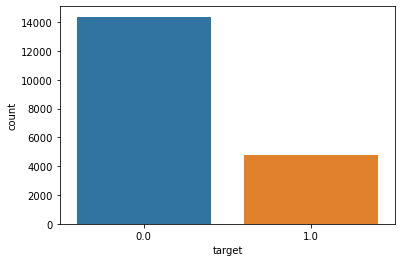

In [39]:
sns.countplot(df['target'])


## We see that the dataset is imbalanced

## So we use SMOTE to resample the training data

<AxesSubplot:xlabel='target', ylabel='count'>

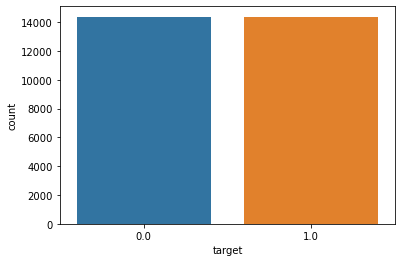

In [40]:
smote = SMOTE(random_state = 232)
X_smote, Y_smote = smote.fit_resample(X,Y)


sns.countplot(Y_smote)

### Now we can clearly see that the data is balanced

In [41]:
X_train, X_val, y_train, y_val = train_test_split(X_smote, Y_smote, test_size = 0.2 ,random_state = 42)

## Normalizing the dataset now

In [42]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_val=sc.fit_transform(X_val)
X=sc.fit_transform(X)

## XGBoost

In [43]:
clf = XGBClassifier(colsample_bytree= 0.8,
 gamma= 1.5,
 max_depth= 5,
 min_child_weight= 1,
 subsample= 0.6)

clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=1.5, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [44]:
clf.score(X_train,y_train)

0.8862618975183624

In [45]:
clf.score(X_val,y_val)

0.49991308882322266

### The score from xgboost is 49.9

## LOGISTIC REGRESSION

In [46]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [47]:
model_lr.score(X_train, y_train)

0.7121561128254161

In [48]:
model_lr.score(X_val, y_val)

0.7175386754736659

### The score from logistic regression is 71.75

## RANDOM FOREST CLASSIFIER

In [49]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)


RandomForestClassifier()

In [50]:
model_rf.score(X_train, y_train)


0.998696162371246

In [51]:
model_rf.score(X_val, y_val)


0.6822527377020685

### The score from random forest classification is 66.79

## SVM

In [52]:
model_svc= SVC()

In [53]:
model_svc.fit(X_train, y_train)

SVC()

In [54]:
model_svc.score(X_train, y_train)

0.778086835586075

In [55]:
model_svc.score(X_val, y_val)

0.7646445332869807

### The score from SVM is 76.46

## SVM GIVES THE HIGHEST SCORE.